In [38]:
import numpy as np

In [39]:
np.random.seed(1)
print(np.random.rand())

0.417022004702574


In [53]:
def sigmoid(x, derive=False, alternative_derive=False):
    if derive:
        return sigmoid(x) * (1 - sigmoid(x))
    elif alternative_derive:
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

In [41]:
X = np.array([[1, 0, 1],
              [1, 1, 1],
              [0, 1, 1],
              [0, 0, 1]
             ])
print(X)

[[1 0 1]
 [1 1 1]
 [0 1 1]
 [0 0 1]]


In [42]:
y = np.array([[0], [1], [1], [0]])
print(y)

[[0]
 [1]
 [1]
 [0]]


In [43]:
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

In [44]:
for j in range(60000):
    
    layer0 = X
    layer1 = sigmoid(np.dot(X, syn0))
    layer2 = sigmoid(np.dot(layer1, syn1))
    
    layer2_error = y - layer2
    
    if (j % 10000 == 0):
        print("Error: ", str(np.mean(np.abs(layer2_error))))
    
    layer2_delta = layer2_error * sigmoid(layer2, derive=True)
    
    layer1_error = layer2_delta.dot(syn1.T)
    
    layer1_delta = layer1_error * sigmoid(layer1, derive=True)
    
    syn1 += layer1.T.dot(layer2_delta)
    syn0 += layer0.T.dot(layer1_delta)

Error:  0.5066960919019428
Error:  0.00022800039767535333
Error:  0.00011285690055429404
Error:  7.529301646468935e-05
Error:  5.659959042532627e-05
Error:  4.5389927152115914e-05


In [45]:
print("Output after training")
print(layer2)

Output after training
[[3.57855379e-05]
 [9.99958417e-01]
 [9.99959145e-01]
 [3.34213551e-05]]


In [46]:
sigmoid(np.dot(X, syn0))

array([[6.25423572e-01, 4.86964147e-01, 1.25684005e-03, 4.03670239e-01],
       [6.63965874e-03, 8.84666384e-14, 9.99215984e-01, 4.12678659e-07],
       [4.40698744e-03, 1.01771197e-13, 9.99954273e-01, 5.26426897e-07],
       [5.25108604e-01, 5.21972436e-01, 2.11357289e-02, 4.63377669e-01]])

In [50]:
import matplotlib
import matplotlib.pyplot as plt

In [64]:
x = np.arange(-10.0, 10.0, 0.01)
y = sigmoid(x, derive=True)
y_alt = sigmoid(x, alternative_derive=True)

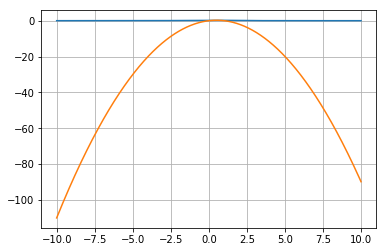

In [65]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_alt)
ax.grid()